In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [3]:
def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
# Load in pickled data
videos = load_obj('data_wo_segments')

video_name = 'Help.mp4'
subject_name = 'Subject_1'

In [5]:
# joins together two columns for chosen video and subject
videos[video_name][subject_name]['z'] = videos[video_name][subject_name]['s_bin_zone'].apply(str) + videos[video_name][subject_name]['s_bin_band'].apply(str) + videos[video_name][subject_name]['e_bin_zone'].apply(str) + videos[video_name][subject_name]['e_bin_band'].apply(str)

In [6]:
# Get vid for subj
df_single = videos[video_name][subject_name]

# Generate z_2 (destination node) and z_3 origin+destination node
df_single['z_2'] = df_single['z'].shift().apply(str)
df_single['z_3'] = df_single['z'].apply(str) + df_single['z_2'].apply(str)

# Drop first row
df_single = df_single.drop(0)

In [7]:
# Count unique edges and nodes
df_single['edge_count'] = df_single.groupby(['z_3']).z_3.transform('size')
df_single['node_count'] = df_single.groupby(['z']).z.transform('size')

In [8]:
# Get unique edges + their counts from df_help_subj1
df_graph_data = df_single.drop_duplicates(['z_3'])[['z','z_2','edge_count','node_count']]

# Calculate average
df_graph_data['probability'] = round(df_graph_data.edge_count/df_graph_data.node_count, 3)

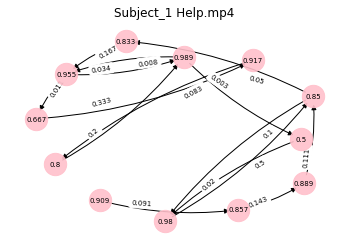

In [9]:
G = nx.DiGraph()

for i in range(len(df_graph_data)):
    # If we try to connect two vertices that are the same, we need to set the node_weight
    # In order to visualize them correctly
    if df_graph_data.iloc[i].z != df_graph_data.iloc[i].z_2:
        G.add_edge(df_graph_data.iloc[i].z, df_graph_data.iloc[i].z_2, weight=df_graph_data.iloc[i].probability)
    else:
        G.add_node(df_graph_data.iloc[i].z, weight=df_graph_data.iloc[i].probability)

pos = nx.spring_layout(G, k=6, seed=2)

plt.figure()  

# Draw nodes and edges
nodes = nx.draw_networkx_nodes(G, pos, node_size=500, node_color='pink', alpha=0.9, linewidths=1)
edges = nx.draw_networkx_edges(G, pos, connectionstyle="arc3,rad=0.1", edge_color='black', width=1)

# Draw labels
node_labels = nx.get_node_attributes(G,'weight')
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.7, font_size=7)

# Draw plot
plt.axis('off')
plt.title(subject_name + ' ' + video_name)
plt.show()